In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.fftpack import fft, fftfreq, fftshift
from scipy import signal
import matplotlib.pylab as plt
%matplotlib inline

In [10]:
data = pd.read_csv("pulse.csv")

In [11]:
data.head()

,Oxs_RungeKuttaEvolve:evolve:Total energy (J),Oxs_RungeKuttaEvolve:evolve:Energy calc count,Oxs_RungeKuttaEvolve:evolve:Max dm/dt (deg/ns),Oxs_RungeKuttaEvolve:evolve:dE/dt (J/s),Oxs_RungeKuttaEvolve:evolve:Delta E (J),Oxs_CubicAnisotropy::Energy (J),Oxs_UniformExchange::Energy (J),Oxs_UniformExchange::Max Spin Ang (deg),Oxs_UniformExchange::Stage Max Spin Ang (deg),Oxs_UniformExchange::Run Max Spin Ang (deg),...,Oxs_TimeDriver::Stage iteration,Oxs_TimeDriver::Stage,Oxs_TimeDriver::mx,Oxs_TimeDriver::my,Oxs_TimeDriver::mz,Oxs_TimeDriver::mx_corner,Oxs_TimeDriver::my_corner,Oxs_TimeDriver::mz_corner,Oxs_TimeDriver::Last time step (s),Oxs_TimeDriver::Simulation time (s)
0,-1.982833e-17,1,4682.757019,-4.721312e-08,0.000000e+00,-8.991726e-22,0.000000e+00,0.000000,0.000000,0.000000,...,0,0,0.999750,0.019995,0.009998,0.999750,0.019995,0.009998,0.000000e+00,0.000000e+00
1,-1.982843e-17,7,4682.848356,-4.706827e-08,-9.563524e-23,-8.965681e-22,3.780805e-26,0.003734,0.003734,0.003734,...,1,0,0.999751,0.019994,0.009927,0.999751,0.019995,0.009895,2.028719e-15,2.028719e-15
2,-1.982881e-17,13,4683.204707,-4.648890e-08,-3.796025e-22,-8.863557e-22,9.451572e-25,0.018669,0.018669,0.018669,...,2,0,0.999754,0.019989,0.009647,0.999755,0.019998,0.009485,8.114878e-15,1.014360e-14
3,-1.983028e-17,19,4684.485768,-4.417149e-08,-1.471397e-21,-8.487976e-22,1.666928e-23,0.078370,0.078370,0.078370,...,3,0,0.999764,0.019972,0.008525,0.999769,0.020008,0.007844,3.245951e-14,4.260311e-14
4,-1.983541e-17,25,4687.275895,-3.488107e-08,-5.132592e-21,-7.512176e-22,2.728341e-22,0.316444,0.316444,0.316444,...,4,0,0.999791,0.019954,0.004039,0.999792,0.020084,0.001285,1.298380e-13,1.724411e-13


In [22]:
time = data.ix[:,27]
mz =data.ix[:,22]

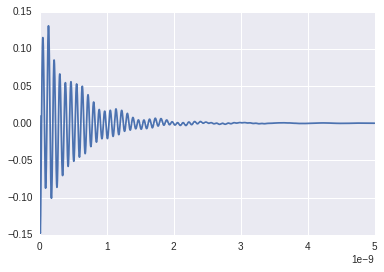

In [23]:
#sb.regplot(x = data['Time'], y = data['mz'], scatter = True, fit_reg=False)
plt.plot(time, mz)

In [5]:
dt = data['Time'][1] - data['Time'][0]
n = len(data['mz']) 
mz_fft = fft(data['mz'])/n
freq = fftfreq(n, dt)


#Shift frequencies
mz_fft_shifted = np.fft.fftshift(mz_fft)
freq_shifted = np.fft.fftshift(freq)

(0, 40000000000000.0)

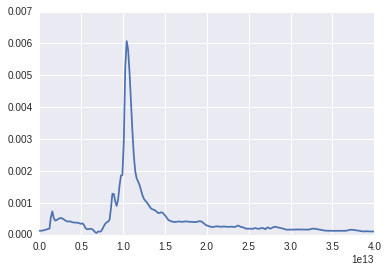

In [6]:
plt.plot(freq_shifted, abs(mz_fft_shifted))
plt.xlim(0, 0.4e14)

In [7]:
max_freq = freq[mz_fft.argmax()]
print('The dominating frequency is {0:.3g} Hz'.format(max_freq))

The dominating frequency is 1.13e+13 Hz


In [15]:
peakind = signal.find_peaks_cwt(abs(mz_fft), np.arange(1,80))
peaks = []
x_peaks = []
for index in peakind:
    x_peaks.append(freq[index])
    peaks.append(abs(mz_fft[index]))
    
    
    

(0, 20000000000000.0)

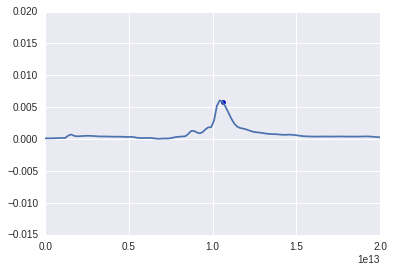

In [16]:
plt.scatter(x_peaks, peaks)
plt.plot(freq_shifted, abs(mz_fft_shifted))
plt.xlim(0, 0.2e14)

In [39]:
print(len(peakind))

72


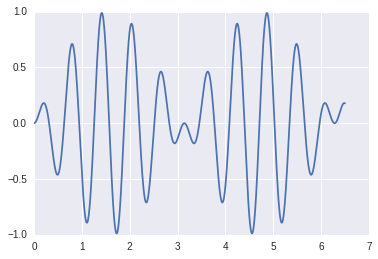

In [24]:
x = np.linspace(0, 6.5, 100000)
y = np.sin(x)*np.sin(10*x)
plt.plot(x,y)

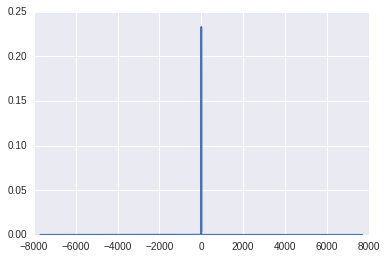

In [27]:
n = len(x) 
dt = x[1]-x[0]
y_fft = fft(y)/n
freq_x = fftfreq(n, dt)

y_fft_shift = np.fft.fftshift(y_fft)
freq_x_shifted = np.fft.fftshift(freq_x)
plt.plot(freq_x_shifted, abs(y_fft_shift))